# Projet MAD 

Importation des libraries utiles

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from scipy.special import boxcox1p

#### Importation du DataSet et appercu 

In [17]:
data = pd.read_csv("googleplaystore.csv")
dataType = data.dtypes
print(data.shape)
data.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### On calcule le pourcentage de valeur null en fonction des variables

In [24]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)


,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


#### Nettoyage des données 


In [26]:

data.dropna(how ='any', inplace = True)
desc = data.describe()
print(len(data[data.Size == 'Varies with device']))
print(data.shape)


1637
(9360, 13)


#### Plot de la distribution de #notes

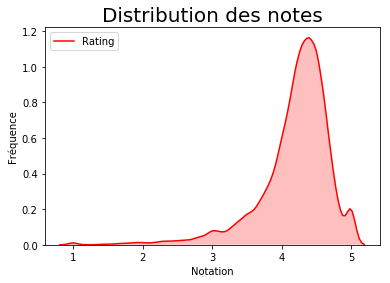

In [4]:
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Notation")
g.set_ylabel("Fréquence")
plt.title('Distribution des notes',size = 20)
#plt.savefig('rating_freq.png')

#### Traitement de la variable Size
remplace par des nan (valeur null)

In [5]:
data['Size'].replace('Varies with device', np.nan, inplace = True )


#### Les tailles sont exprimées en "[0-9]*M ou [0-9]*k 
On les converties en int

In [6]:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

#### Plot de la variable Size

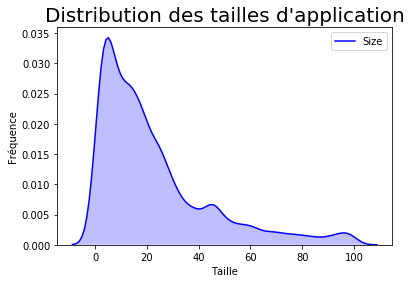

In [7]:
ax = sns.kdeplot(data.Size, color="Blue", shade = True)
ax.set_xlabel("Taille")
ax.set_ylabel("Fréquence")
plt.title('Distribution des tailles d\'application',size = 20)
#plt.savefig('size_freq2.png')

#### Répartition par catégorie 

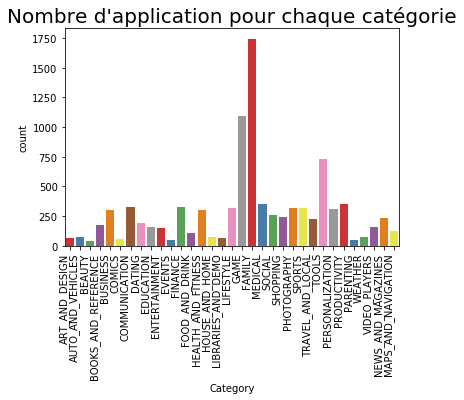

In [8]:
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Nombre d\'application pour chaque catégorie' ,size = 20)
#plt.savefig('count_cat.png',bbox_inches='tight')

Boxplot Note VS Content Rating

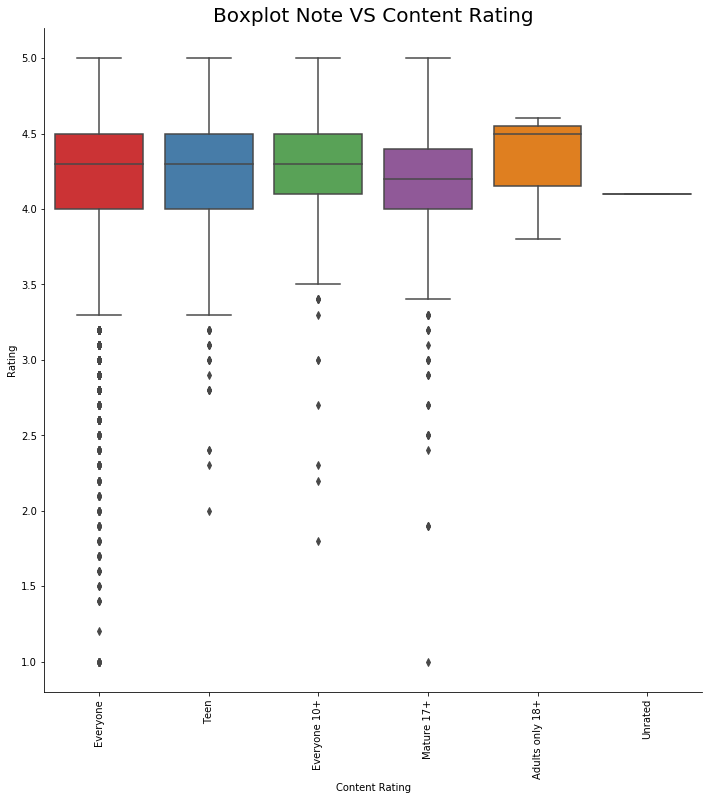

In [9]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.set_xticklabels(rotation=90)
plt.title('Boxplot Note VS Content Rating',size = 20)
#plt.savefig('box_content_rating.png',bbox_inches='tight')

####  Description des installations

In [10]:
print(data['Installs'].unique())
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',',''))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+',''))
data['Installs'] = data['Installs'].apply(lambda x: int(x))
Sorted_value = sorted(list(data['Installs'].unique()))
print(data.describe())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']
            Rating         Size      Installs
count  9360.000000  9360.000000  9.360000e+03
mean      4.191838    22.495626  1.790875e+07
std       0.515263    21.669032  9.126637e+07
min       1.000000     0.008500  1.000000e+00
25%       4.000000     6.600000  1.000000e+04
50%       4.300000    16.000000  5.000000e+05
75%       4.500000    30.000000  5.000000e+06
max       5.000000   100.000000  1.000000e+09


#### Skewness 

In [12]:
skewness = data['Installs'].skew() 
print(skewness)
data['Installs'] =  boxcox1p(data['Installs'], 0.25)

1.8382798253721517


#### Boxplot of Rating VS Category

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

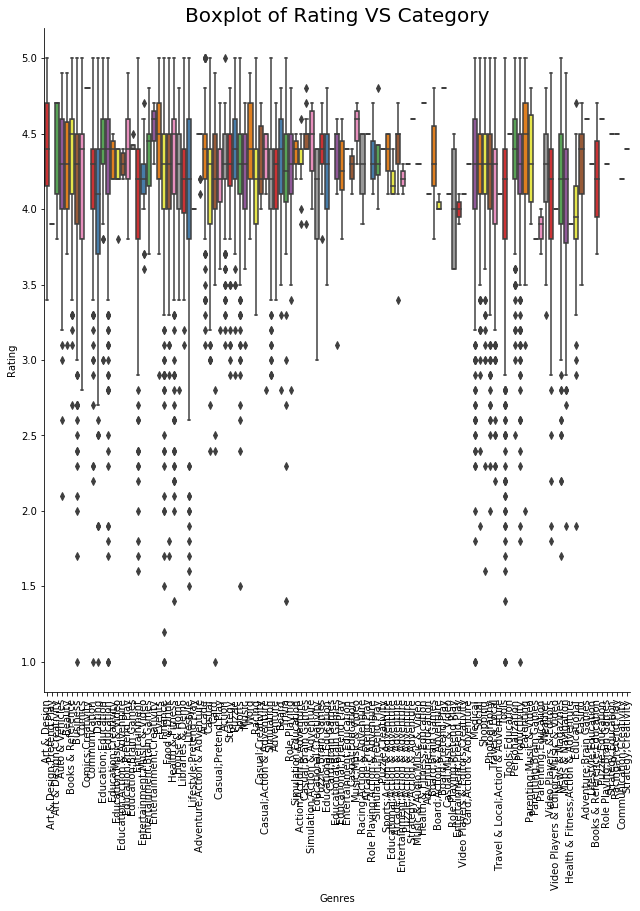

In [13]:
g = sns.catplot(x="Genres",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.set_xticklabels(rotation=90)

g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)
#data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )


#### Nettoyage du prix 

In [14]:

print(data['Price'].unique())

print(data.dtypes)
print(data['Reviews'].unique())
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Type'] = data['Type'].apply(lambda x: str(x).replace('Free','0'))
data['Type'] = data['Type'].apply(lambda x: str(x).replace('Paid','1'))
data['Type'] = data['Type'].apply(lambda x: int(x))

data['Price'] = data['Price'].apply(lambda x: str(x).replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']
App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
['159' '967' '87510' ... '60